In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from collections import Counter


In [ ]:
url='https://raw.githubusercontent.com/ShubhankarRawat/Heart-Disease-Prediction/master/cleveland.csv'
columns=['age', 'sex', 'cp', 'trestbps', 'chol','fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df=pd.read_csv(url,names=columns)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [ ]:
df.shape

(303, 14)

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
df['target'].replace({2:1,3:1,4:1},inplace=True)

In [ ]:
df.isnull().sum()
#sex,cp,thalach,exang,oldpeak,slope,ca,thal

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [ ]:
for column in df:
  sns.displot(x=column, data=df)

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
features=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [ ]:
list(enumerate(features))

plt.figure(figsize=(15,15))
plt.tick_params(labelbottom=False)
for i in enumerate(features):
  x=plt.subplot(4,3,i[0]+1)
  sns.histplot(data=df,x=i[1])

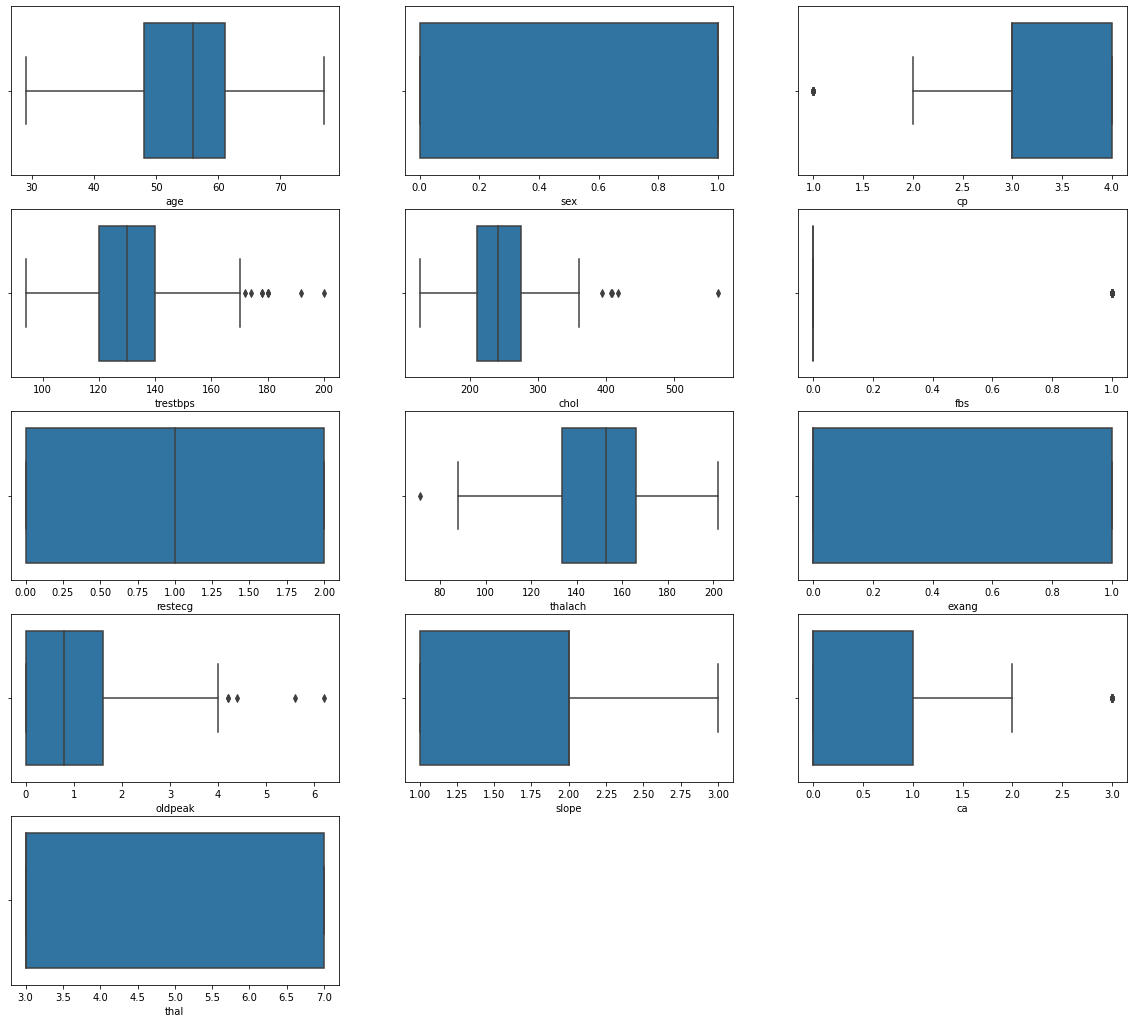

In [ ]:
plt.figure(figsize=(20,18))

plt.subplot(5,3,1)
sns.boxplot(x=df['age'], data=df)

plt.subplot(5,3,2)
sns.boxplot(x=df['sex'], data=df)

plt.subplot(5,3,3)
sns.boxplot(x=df['cp'], data=df)

plt.subplot(5,3,4)
sns.boxplot(x=df['trestbps'], data=df)

plt.subplot(5,3,5)
sns.boxplot(x=df['chol'], data=df)

plt.subplot(5,3,6)
sns.boxplot(x=df['fbs'], data=df)

plt.subplot(5,3,7)
sns.boxplot(x=df['restecg'], data=df)

plt.subplot(5,3,8)
sns.boxplot(x=df['thalach'], data=df)

plt.subplot(5,3,9)
sns.boxplot(x=df['exang'], data=df)

plt.subplot(5,3,10)
sns.boxplot(x=df['oldpeak'], data=df)

plt.subplot(5,3,11)
sns.boxplot(x=df['slope'], data=df)

plt.subplot(5,3,12)
sns.boxplot(x=df['ca'], data=df)

plt.subplot(5,3,13)
sns.boxplot(x=df['thal'], data=df)

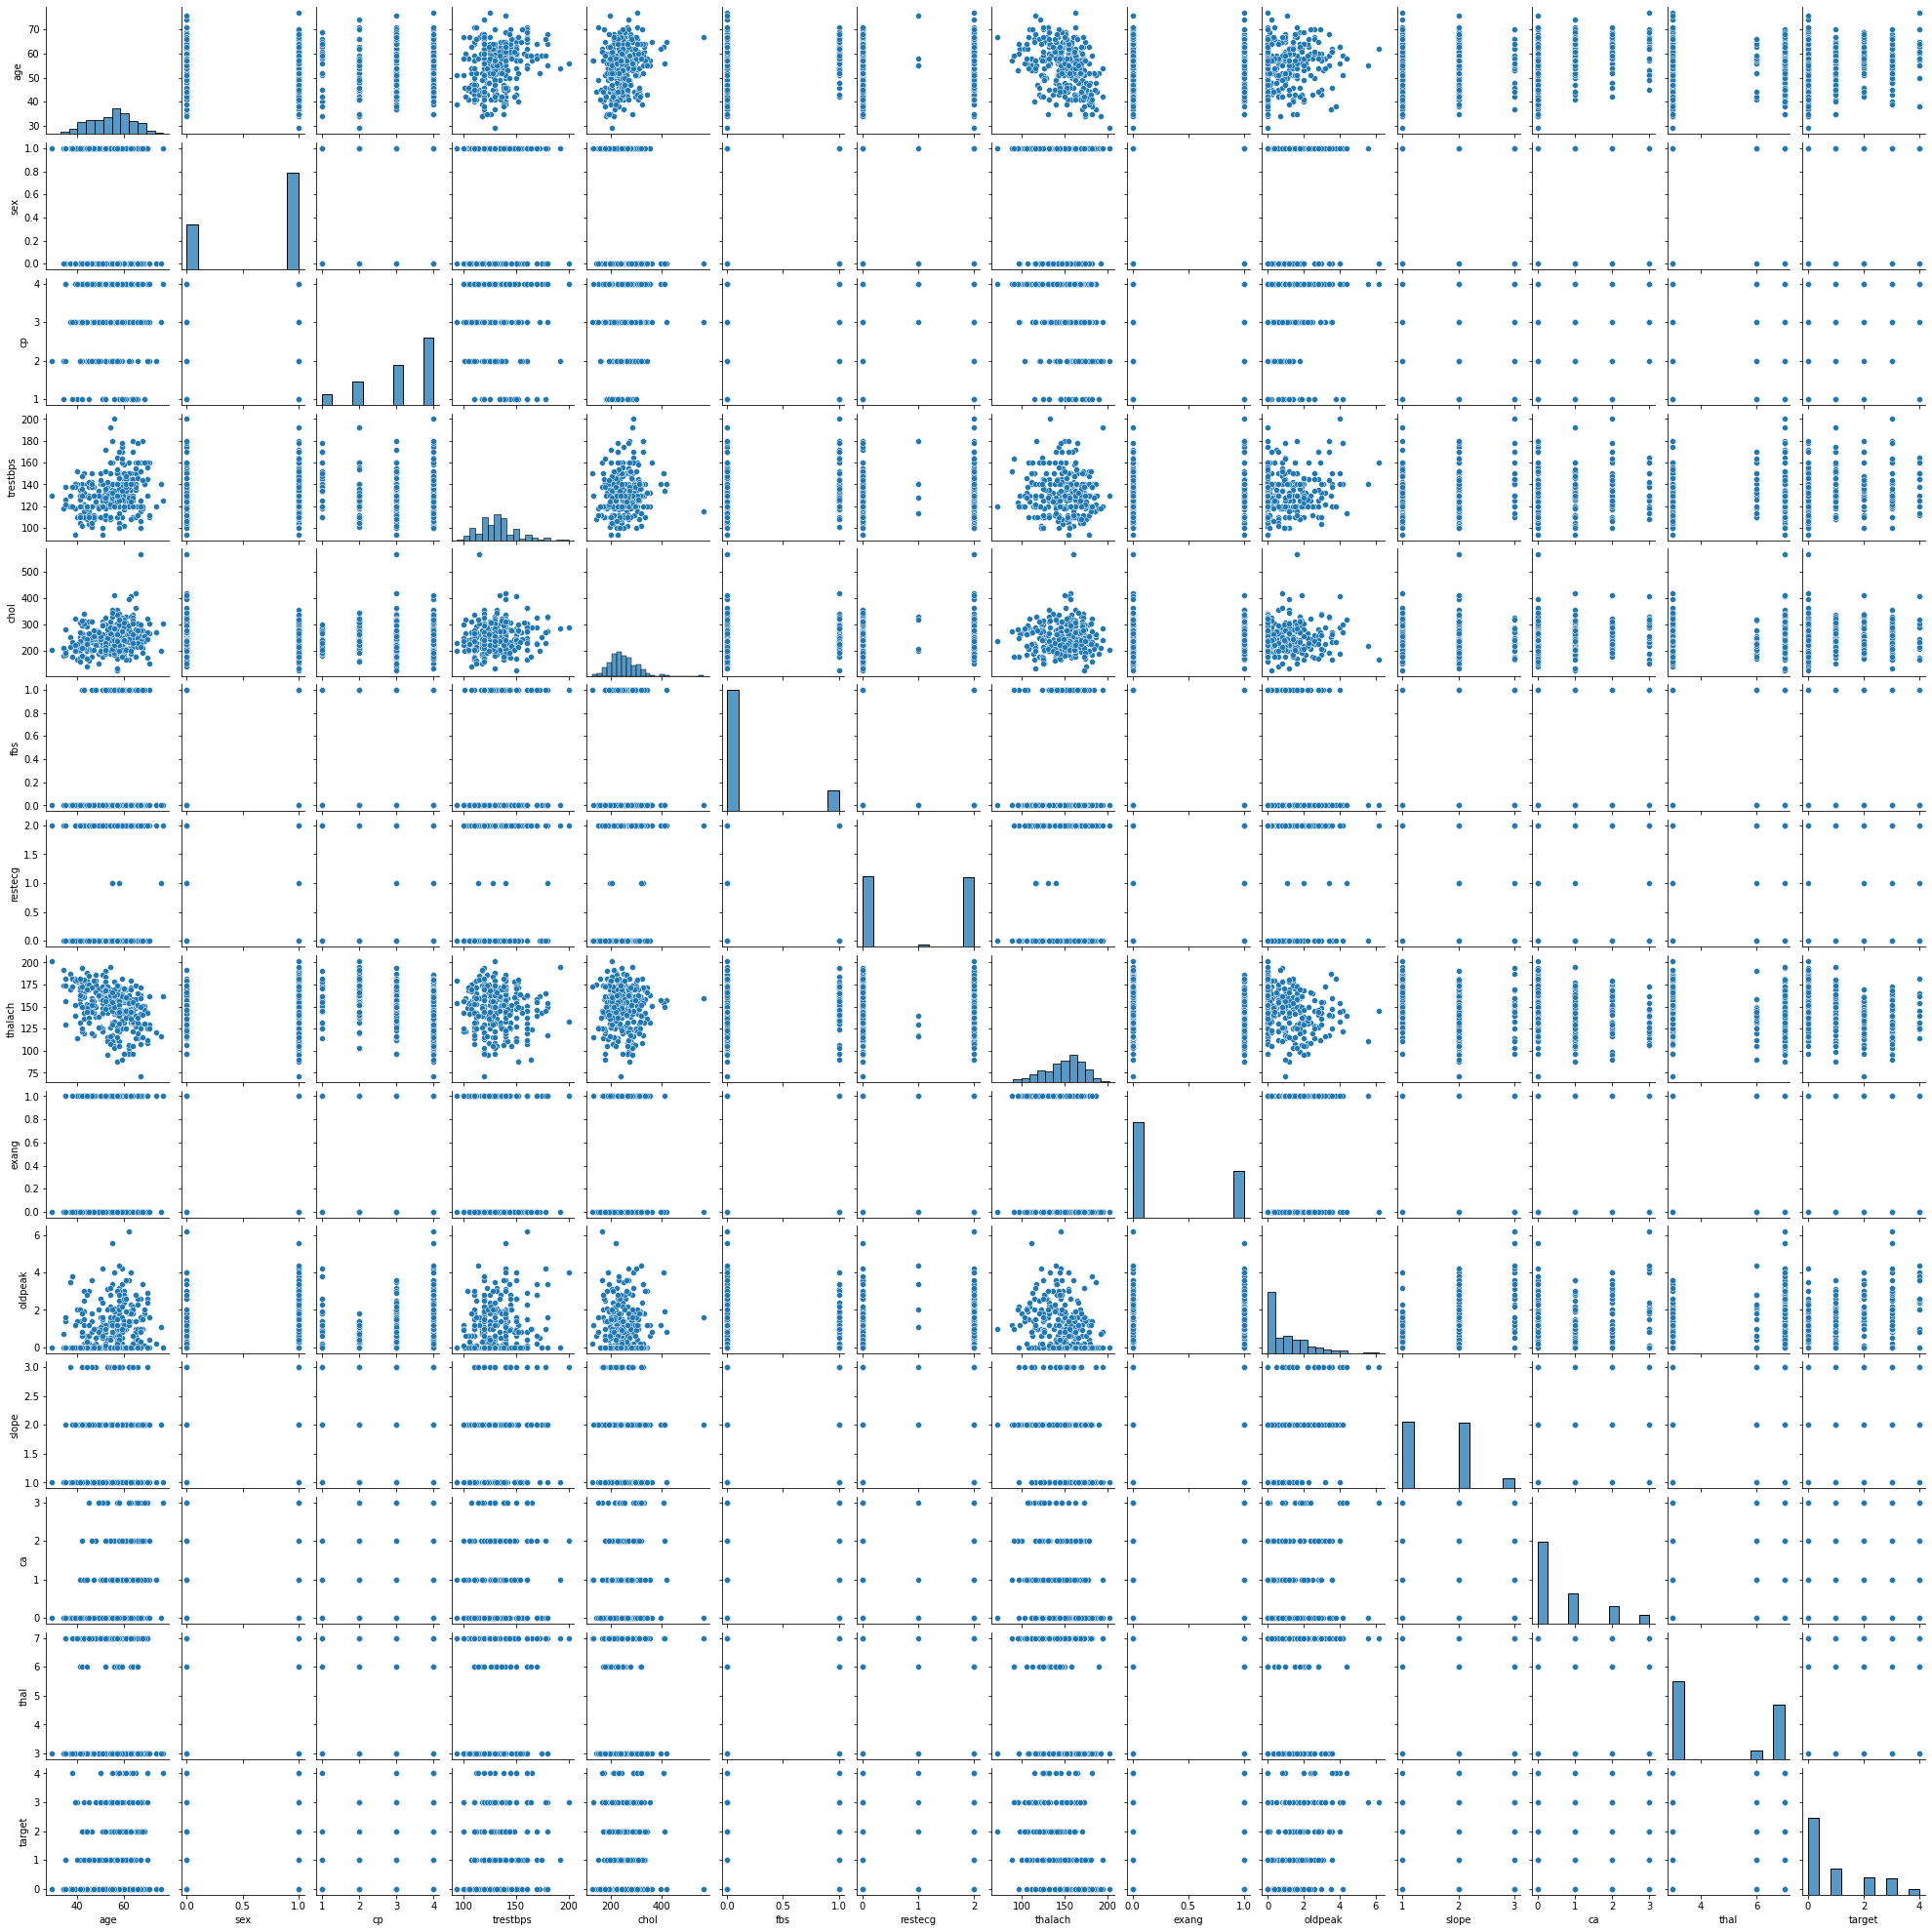

In [ ]:
sns.pairplot(df[features],height=2,kind='scatter')

In [ ]:
df.fillna(0,inplace=True)

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
co=df.corr()
co['target'].sort_values(ascending=False)

target      1.000000
thal        0.512574
ca          0.460033
exang       0.431894
oldpeak     0.424510
cp          0.414446
slope       0.339213
sex         0.276816
age         0.223120
restecg     0.169202
trestbps    0.150825
chol        0.085164
fbs         0.025264
thalach    -0.417167
Name: target, dtype: float64

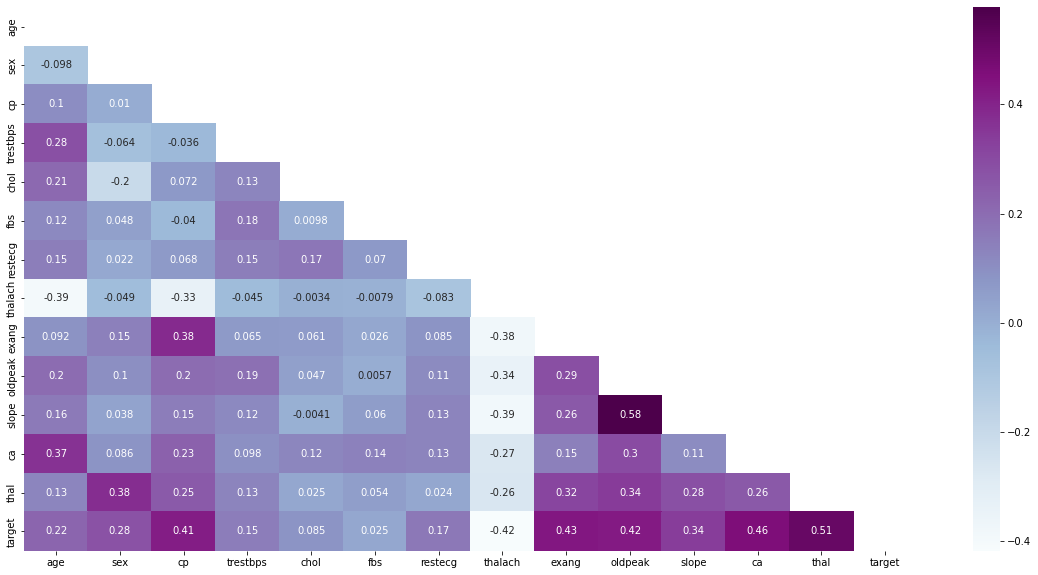

In [ ]:
plt.figure(figsize=(20,10))
lower=np.triu(co)
sns.heatmap(co,mask=lower,annot=True,cmap='BuPu')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


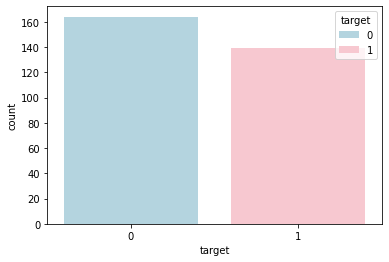

In [ ]:
sns.countplot(df['target'],hue=df['target'],palette=['lightblue','pink'],dodge=False)
#Check the balance of the data

In [ ]:
print(sorted(Counter(df['target']).items()))

[(0, 164), (1, 139)]


#Univariate Selection

In [ ]:

array=df.values
x=array[:,0:13]
y=array[:,13]

test=SelectKBest(score_func=f_classif, k=8)
fit=test.fit(x,y)

print(fit.scores_)
features=fit.transform(x)
print(features)
#sex,cp,thalach,exang,oldpeak,slope,ca,thal

[ 4.89133958  6.24231561 17.64797806  2.03310269  0.86575308  1.97355823
  3.63764689 19.11895677 19.04600412 26.23739863 12.85357852 28.46036635
 29.20640559]
[[  1.   1. 150. ...   3.   0.   6.]
 [  1.   4. 108. ...   2.   3.   3.]
 [  1.   4. 129. ...   2.   2.   7.]
 ...
 [  1.   4. 115. ...   2.   1.   7.]
 [  0.   2. 174. ...   2.   1.   3.]
 [  1.   3. 173. ...   1.   0.   3.]]


#Recursive Feature Elimination

In [ ]:
model=LogisticRegression()
rfe=RFE(model,n_features_to_select=8)
fit=rfe.fit(x,y)

print('Number of features %d' % fit.n_features_)
print('Selected features %s' % fit.support_)
print('Rank of the F=features %s' %fit.ranking_)
#sex,cp,fbs,restecg,exang,oldpeak,slope,ca

Number of features 8
Selected features [False  True  True False False  True  True False  True  True  True  True
 False]
Rank of the F=features [3 1 1 5 6 1 1 4 1 1 1 1 2]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


#PCA

In [ ]:
pca=PCA(n_components=13)
fit=pca.fit(x)
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(x)
print(selector.variances_)
#print('Explained features %s' %fit.explained_variance_ratio_)
#print(fit.components_)

[4.80000000e+01 2.17647507e-01 9.18798811e-01 1.06000000e+02
 4.38000000e+02 1.26458190e-01 9.86700650e-01 1.31000000e+02
 2.19978433e-01 1.34364605e+00 3.78481412e-01 8.70176127e-01
 3.87216940e+00]


#Decision Tree


In [ ]:
model=ExtraTreesClassifier(n_estimators=10)
model.fit(x,y)
print(model.feature_importances_)
#Large the score more important
#thal,ca,oldpeak,thalach,age,cp,trestbps,chol,exang

[0.07990716 0.0388076  0.07306949 0.08431649 0.10445    0.03135839
 0.04417245 0.11282382 0.06774004 0.1145822  0.04746243 0.11070411
 0.09060584]


In [ ]:
df_uni = df[['sex','cp','thalach','exang','oldpeak','slope','ca','thal','target']]
df_uni

,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,1,1,150,0,2.3,3,0.0,6.0,0
1,1,4,108,1,1.5,2,3.0,3.0,1
2,1,4,129,1,2.6,2,2.0,7.0,1
3,1,3,187,0,3.5,3,0.0,3.0,0
4,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...
298,1,1,132,0,1.2,2,0.0,7.0,1
299,1,4,141,0,3.4,2,2.0,7.0,1
300,1,4,115,1,1.2,2,1.0,7.0,1
301,0,2,174,0,0.0,2,1.0,3.0,1


In [ ]:
df_lr = df[['sex','cp','fbs','restecg','exang','oldpeak','slope','ca','target']]
df_lr

,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,target
0,1,1,1,2,0,2.3,3,0.0,0
1,1,4,0,2,1,1.5,2,3.0,1
2,1,4,0,2,1,2.6,2,2.0,1
3,1,3,0,0,0,3.5,3,0.0,0
4,0,2,0,2,0,1.4,1,0.0,0
...,...,...,...,...,...,...,...,...,...
298,1,1,0,0,0,1.2,2,0.0,1
299,1,4,1,0,0,3.4,2,2.0,1
300,1,4,0,0,1,1.2,2,1.0,1
301,0,2,0,2,0,0.0,2,1.0,1


In [ ]:
df_pca = df[['age','cp','trestbps','chol','restecg','thalach','oldpeak','thal','target']]
df_pca

,age,cp,trestbps,chol,restecg,thalach,oldpeak,thal,target
0,63,1,145,233,2,150,2.3,6.0,0
1,67,4,160,286,2,108,1.5,3.0,1
2,67,4,120,229,2,129,2.6,7.0,1
3,37,3,130,250,0,187,3.5,3.0,0
4,41,2,130,204,2,172,1.4,3.0,0
...,...,...,...,...,...,...,...,...,...
298,45,1,110,264,0,132,1.2,7.0,1
299,68,4,144,193,0,141,3.4,7.0,1
300,57,4,130,131,0,115,1.2,7.0,1
301,57,2,130,236,2,174,0.0,3.0,1


In [ ]:
df_etc = df[['age','cp','trestbps','chol','thalach','oldpeak','ca','thal','target']]
df_etc

,age,cp,trestbps,chol,thalach,oldpeak,ca,thal,target
0,63,1,145,233,150,2.3,0.0,6.0,0
1,67,4,160,286,108,1.5,3.0,3.0,1
2,67,4,120,229,129,2.6,2.0,7.0,1
3,37,3,130,250,187,3.5,0.0,3.0,0
4,41,2,130,204,172,1.4,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...
298,45,1,110,264,132,1.2,0.0,7.0,1
299,68,4,144,193,141,3.4,2.0,7.0,1
300,57,4,130,131,115,1.2,1.0,7.0,1
301,57,2,130,236,174,0.0,1.0,3.0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import sklearn
from seaborn.axisgrid import Grid
from sklearn.model_selection import GridSearchCV

#Machine Learning: Univariate

In [ ]:
array_uni =df_uni.values
X= array_uni[:,0:8]
y = array_uni[:,8]

In [ ]:
df_uni

,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,1,1,150,0,2.3,3,0.0,6.0,0
1,1,4,108,1,1.5,2,3.0,3.0,1
2,1,4,129,1,2.6,2,2.0,7.0,1
3,1,3,187,0,3.5,3,0.0,3.0,0
4,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...
298,1,1,132,0,1.2,2,0.0,7.0,1
299,1,4,141,0,3.4,2,2.0,7.0,1
300,1,4,115,1,1.2,2,1.0,7.0,1
301,0,2,174,0,0.0,2,1.0,3.0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
tt = {}
il = []
ac = []

for i in range (1,50):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)

  from sklearn.metrics import accuracy_score
  il.append(i)
  ac.append(sklearn.metrics.roc_auc_score(y_test,y_pred))

  tt.update({'K': il})
  tt.update({'ROC_AUC':ac})

In [ ]:
kk = pd.DataFrame(tt)
kk.sort_values('ROC_AUC',ascending=False,inplace=True,ignore_index=True)
kk.head(10)

,K,ROC_AUC
0,30,0.867347
1,29,0.867347
2,28,0.867347
3,27,0.867347
4,21,0.867347
5,39,0.865646
6,37,0.865646
7,20,0.865646
8,36,0.865646
9,18,0.865646


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=30)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
results=confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(results)

results1=classification_report(y_test,y_pred)
print('Classification report')
print(results1)

results2=accuracy_score(y_test,y_pred)
print('Accuracy Score')
print(results2)

Confusion Matrix
[[43  6]
 [ 6 36]]
Classification report
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88        49
         1.0       0.86      0.86      0.86        42

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91

Accuracy Score
0.8681318681318682


In [ ]:
from seaborn.axisgrid import Grid
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100,1000],
           'gamma':[1,0.1,0.01,0.001,0.0001],
           'kernel':['rbf']}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.535 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.535 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.837 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.810 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.786 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.833 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.721 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

y_predict=grid.predict(X_test)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)


In [ ]:
results3=confusion_matrix(y_test,y_predict)
print(results3)

results4=accuracy_score(y_test,y_predict)
print(results4)

results5=classification_report(y_test, y_predict)
print(results5)

[[44  5]
 [ 7 35]]
0.8681318681318682
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88        49
         1.0       0.88      0.83      0.85        42

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predict1=gnb.predict(X_test)
y_predict1

array([0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 1.])

In [ ]:
results6=confusion_matrix(y_test,y_predict1)
print(results6)

results7=accuracy_score(y_test,y_predict1)
print(results7)

results8=classification_report(y_test, y_predict1)
print(results8)

[[44  5]
 [ 7 35]]
0.8681318681318682
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88        49
         1.0       0.88      0.83      0.85        42

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



#Machine Learning: Logistics Regression

In [ ]:
array_lr =df_lr.values
X1= array_lr[:,0:8]
y1 = array_lr[:,8]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size = 0.3, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
tt = {}
il = []
ac = []

for i in range (1,50):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)

  from sklearn.metrics import accuracy_score
  il.append(i)
  ac.append(sklearn.metrics.roc_auc_score(y_test,y_pred))

  tt.update({'K': il})
  tt.update({'ROC_AUC':ac})

In [ ]:
kk = pd.DataFrame(tt)
kk.sort_values('ROC_AUC',ascending=False,inplace=True,ignore_index=True)
kk.head(10)

,K,ROC_AUC
0,25,0.875850
1,27,0.875850
2,28,0.875850
3,29,0.875850
4,23,0.865646
5,24,0.863946
6,26,0.863946
7,30,0.862245
8,9,0.857143
9,11,0.853741


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=25)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
results=confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(results)

results1=classification_report(y_test,y_pred)
print('Classification report')
print(results1)

results2=accuracy_score(y_test,y_pred)
print('Accuracy Score')
print(results2)

Confusion Matrix
[[45  4]
 [ 7 35]]
Classification report
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89        49
         1.0       0.90      0.83      0.86        42

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91

Accuracy Score
0.8791208791208791


In [ ]:
from seaborn.axisgrid import Grid
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100,1000],
           'gamma':[1,0.1,0.01,0.001,0.0001],
           'kernel':['rbf']}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.535 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.535 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.767 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.810 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.833 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.810 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.581 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

y_predict=grid.predict(X_test)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, gamma=0.1)


In [ ]:
results3=confusion_matrix(y_test,y_predict)
print(results3)

results4=accuracy_score(y_test,y_predict)
print(results4)

results5=classification_report(y_test, y_predict)
print(results5)

[[44  5]
 [ 9 33]]
0.8461538461538461
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86        49
         1.0       0.87      0.79      0.82        42

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predict1=gnb.predict(X_test)
y_predict1

array([0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 1.])

In [ ]:
results6=confusion_matrix(y_test,y_predict1)
print(results6)

results7=accuracy_score(y_test,y_predict1)
print(results7)

results8=classification_report(y_test, y_predict1)
print(results8)

[[40  9]
 [ 8 34]]
0.8131868131868132
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82        49
         1.0       0.79      0.81      0.80        42

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



#Machine Learning: PCA

In [ ]:
array_PCA =df_pca.values
X2= array_PCA[:,0:8]
y2 = array_PCA[:,8]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2,y2,test_size = 0.3, random_state=1)

In [ ]:
tt = {}
il = []
ac = []

for i in range (1,50):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  
  from sklearn.metrics import accuracy_score
  il.append(i)
  ac.append(sklearn.metrics.roc_auc_score(y_test,y_pred))

  tt.update({'K': il})
  tt.update({'ROC_AUC':ac})

In [ ]:
kk = pd.DataFrame(tt)
kk.sort_values('ROC_AUC',ascending=False,inplace=True,ignore_index=True)
kk.head(10)

,K,ROC_AUC
0,9,0.765306
1,10,0.761905
2,13,0.732993
3,8,0.726190
4,15,0.710884
5,7,0.709184
6,12,0.705782
7,16,0.704082
8,11,0.702381
9,6,0.700680


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

In [ ]:
results=confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(results)

results1=classification_report(y_test,y_pred)
print('Classification report')
print(results1)

results2=accuracy_score(y_test,y_pred)
print('Accuracy Score')
print(results2)

Confusion Matrix
[[40  9]
 [12 30]]
Classification report
              precision    recall  f1-score   support

         0.0       0.77      0.82      0.79        49
         1.0       0.77      0.71      0.74        42

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91

Accuracy Score
0.7692307692307693


In [ ]:
from seaborn.axisgrid import Grid
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100,1000],
           'gamma':[1,0.1,0.01,0.001,0.0001],
           'kernel':['rbf']}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.535 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.535 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.535 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.535 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.535 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

y_predict=grid.predict(X_test)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.0001)


In [ ]:
results3=confusion_matrix(y_test,y_predict)
print(results3)

results4=accuracy_score(y_test,y_predict)
print(results4)

results5=classification_report(y_test, y_predict)
print(results5)

[[40  9]
 [ 8 34]]
0.8131868131868132
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82        49
         1.0       0.79      0.81      0.80        42

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predict1=gnb.predict(X_test)
y_predict1

array([0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 1.])

In [ ]:
results6=confusion_matrix(y_test,y_predict1)
print(results6)

results7=accuracy_score(y_test,y_predict1)
print(results7)

results8=classification_report(y_test, y_predict1)
print(results8)

[[43  6]
 [ 9 33]]
0.8351648351648352
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85        49
         1.0       0.85      0.79      0.81        42

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



#Machine Learning: Decision Tree

In [ ]:
array_etc =df_etc.values
X3= array_etc[:,0:8]
y3 = array_etc[:,8]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X3,y3,test_size = 0.3, random_state=1)

In [ ]:
tt = {}
il = []
ac = []

for i in range (1,50):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)

  from sklearn.metrics import accuracy_score
  il.append(i)
  ac.append(sklearn.metrics.roc_auc_score(y_test,y_pred))

  tt.update({'K': il})
  tt.update({'ROC_AUC':ac})

In [ ]:
kk = pd.DataFrame(tt)
kk.sort_values('ROC_AUC',ascending=False,inplace=True,ignore_index=True)
kk.head(10)

,K,ROC_AUC
0,9,0.765306
1,10,0.761905
2,13,0.732993
3,8,0.726190
4,14,0.719388
5,15,0.710884
6,7,0.709184
7,16,0.704082
8,11,0.702381
9,6,0.700680


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

In [ ]:
results=confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(results)

results1=classification_report(y_test,y_pred)
print('Classification report')
print(results1)

results2=accuracy_score(y_test,y_pred)
print('Accuracy Score')
print(results2)

Confusion Matrix
[[40  9]
 [12 30]]
Classification report
              precision    recall  f1-score   support

         0.0       0.77      0.82      0.79        49
         1.0       0.77      0.71      0.74        42

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91

Accuracy Score
0.7692307692307693


In [ ]:
from seaborn.axisgrid import Grid
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100,1000],
           'gamma':[1,0.1,0.01,0.001,0.0001],
           'kernel':['rbf']}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.535 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.535 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.535 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.535 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.535 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

y_predict=grid.predict(X_test)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.0001)


In [ ]:
results3=confusion_matrix(y_test,y_predict)
print(results3)

results4=accuracy_score(y_test,y_predict)
print(results4)

results5=classification_report(y_test, y_predict)
print(results5)

[[43  6]
 [ 9 33]]
0.8351648351648352
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85        49
         1.0       0.85      0.79      0.81        42

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predict1=gnb.predict(X_test)
y_predict1

array([0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 1.])

In [ ]:
results6=confusion_matrix(y_test,y_predict1)
print(results6)

results7=accuracy_score(y_test,y_predict1)
print(results7)

results8=classification_report(y_test, y_predict1)
print(results8)

[[42  7]
 [11 31]]
0.8021978021978022
              precision    recall  f1-score   support

         0.0       0.79      0.86      0.82        49
         1.0       0.82      0.74      0.78        42

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



#Machine Learning: Original Dataset

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [ ]:
array_ori =df.values
X4= array_ori[:,0:13]
y4 = array_ori[:,13]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X4,y4,test_size = 0.3, random_state=1)

In [ ]:
tt = {}
il = []
ac = []

for i in range (1,50):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)

  from sklearn.metrics import accuracy_score
  il.append(i)
  ac.append(sklearn.metrics.roc_auc_score(y_test,y_pred))

  tt.update({'K': il})
  tt.update({'ROC_AUC':ac})

In [ ]:
kk = pd.DataFrame(tt)
kk.sort_values('ROC_AUC',ascending=False,inplace=True,ignore_index=True)
kk.head(10)

,K,ROC_AUC
0,9,0.765306
1,10,0.761905
2,13,0.732993
3,8,0.726190
4,15,0.710884
5,7,0.709184
6,16,0.704082
7,11,0.702381
8,6,0.700680
9,14,0.697279


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

In [ ]:
results=confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(results)

results1=classification_report(y_test,y_pred)
print('Classification report')
print(results1)

results2=accuracy_score(y_test,y_pred)
print('Accuracy Score')
print(results2)

Confusion Matrix
[[40  9]
 [12 30]]
Classification report
              precision    recall  f1-score   support

         0.0       0.77      0.82      0.79        49
         1.0       0.77      0.71      0.74        42

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91

Accuracy Score
0.7692307692307693


In [ ]:
from seaborn.axisgrid import Grid
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100,1000],
           'gamma':[1,0.1,0.01,0.001,0.0001],
           'kernel':['rbf']}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.535 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.535 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.535 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.535 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.535 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

y_predict=grid.predict(X_test)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.0001)


In [ ]:
results3=confusion_matrix(y_test,y_predict)
print(results3)

results4=accuracy_score(y_test,y_predict)
print(results4)

results5=classification_report(y_test, y_predict)
print(results5)

[[42  7]
 [ 9 33]]
0.8241758241758241
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84        49
         1.0       0.82      0.79      0.80        42

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predict1=gnb.predict(X_test)
y_predict1

array([0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 1.])

In [ ]:
results6=confusion_matrix(y_test,y_predict1)
print(results6)

results7=accuracy_score(y_test,y_predict1)
print(results7)

results8=classification_report(y_test, y_predict1)
print(results8)

[[43  6]
 [ 6 36]]
0.8681318681318682
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88        49
         1.0       0.86      0.86      0.86        42

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91

